In [4]:
import copy
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
columa_y = int(input("¿En que columna del (0 a N) esta Y? ")) # 49
data = np.loadtxt("/content/gdrive/MyDrive/CASAS_DATASET/data_set_casas_sucre.csv", delimiter=',')

print(data,data.shape)
print()
X = copy.deepcopy(np.delete(data, columa_y, axis=1)) 
y = copy.deepcopy(data[:,columa_y])
print(X,X.shape)
print()
print(y,y.shape)

m = y.shape[0]

In [7]:
def  featureNormalize(X): # Normalizacion 
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0) # media a lo lago de las filas
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

In [10]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]        # filas de y
    J = 0    
    h = np.dot(X, theta)    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))   
    return J

In [11]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):    
    m = y.shape[0] # numero de ejemplos de entrenamiento  realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()    
    J_history = []    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))   
    return theta, J_history

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100000
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(data.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# ejemplos con su reepectiva dimencion 

X_prueba = [1,-19.051465,-65.262740,5,3,1000,700,10,3,9] # el valor real y = 600000 
logitud = len(X_prueba) 
X_prueba[1:logitud] = (X_prueba[1:logitud] - mu) / sigma
Y_Prueba = np.dot(X_prueba, theta)   # Se debe cambiar esto

print("ultimo costo J = ", J_history[-1])
print("---"*20)
print(" Theta = ", theta)
print("---"*20)
print('Prediccion de Y = ',Y_Prueba)


Text(0, 0.5, 'Costo J')

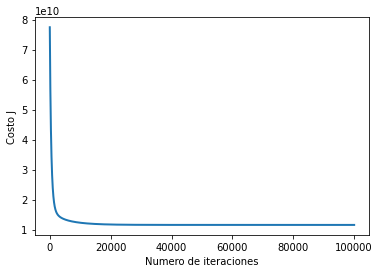

In [14]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
